# Ejemplo con dataset de flores y agrupación aglomerativa



In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Cargamos dataset Iris
iris = load_iris()

#Extraer los datos (medidas de las flores)
iris_data = iris.data

# Mostramos tabla con los datos
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
# Vamos a trabajar con las columnas 3 y 4 (tamaño de los pétalos)
datos_petalos = iris_data_pd.iloc[:, 2:4]
datos_petalos

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [11]:
iris.target_names # Tipos de flores

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

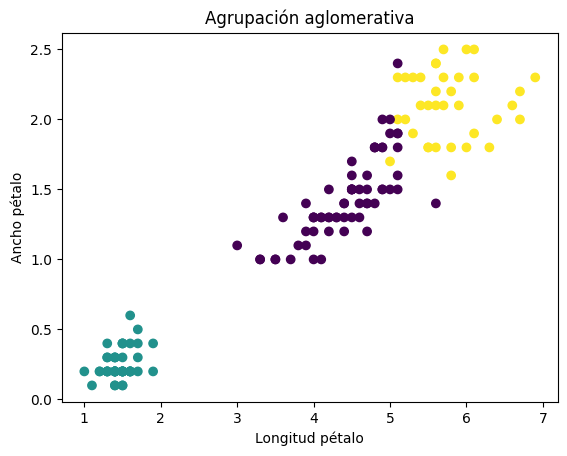

In [20]:
agglo = AgglomerativeClustering(n_clusters=3, linkage="ward")
agglo.fit(iris_data_pd) # Clustering sobre 2 dimensiones (solo tiene en cuenta pétalos)

plt.scatter(datos_petalos.iloc[:,0], datos_petalos.iloc[:,1], c=agglo.labels_)
plt.xlabel("Longitud pétalo")
plt.ylabel("Ancho pétalo")
plt.title("Agrupación aglomerativa")

plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')